<a href="https://colab.research.google.com/github/Chirag314/Tensorflow-practice/blob/main/Time_series_stock_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series- stock market


*  In this notebook we will be working on data from stock market. We will learn how to get data , visualize and anlayze and predict based on previous performance .
### This notebook is inspired by 
https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [15]:
!pip install yfinance
!pip install fix_yahoo_finance
from pandas_datareader.data import DataReader
import yfinance as yf
from datetime import datetime

In [16]:
# tech stock we will use for this analysis
tech_list=["TSLA" , "AMD", "INTC" ,"NVDA"]
end = datetime.now()
start = datetime(end.year -1, end.month, end.day)
print(start)
for stock in tech_list:
  globals()[stock] = yf.download(stock, start, end)


2021-03-18 00:00:00
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### lets check the data

In [17]:
company_list = [TSLA, AMD, INTC, NVDA]
company_name = ["TESLA", "AMD", "INTEL", "NVIDIA"]
for company, com_name in zip(company_list, company_name):
  company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
print(df.head(5))
df.tail(10)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-03-18  684.289978  689.229980  652.000000  653.159973  653.159973   
2021-03-19  646.599976  657.229980  624.619995  654.869995  654.869995   
2021-03-22  684.590027  699.619995  668.750000  670.000000  670.000000   
2021-03-23  675.770020  677.799988  657.510010  662.159973  662.159973   
2021-03-24  667.909973  668.020020  630.109985  630.270020  630.270020   

              Volume company_name  
Date                               
2021-03-18  33224800        TESLA  
2021-03-19  42894000        TESLA  
2021-03-22  39512200        TESLA  
2021-03-23  30491900        TESLA  
2021-03-24  33795200        TESLA  


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-03-04,233.839996,236.800003,224.820007,229.360001,229.360001,43141500,NVIDIA
2022-03-07,228.169998,230.330002,213.300003,213.520004,213.520004,45082100,NVIDIA
2022-03-08,213.089996,223.729996,206.500000,215.139999,215.139999,55746700,NVIDIA
2022-03-09,223.869995,232.199997,222.470001,230.139999,230.139999,49274200,NVIDIA
2022-03-10,225.309998,227.880005,218.820007,226.580002,226.580002,42806600,NVIDIA
2022-03-11,230.220001,231.449997,220.460007,221.000000,221.000000,36659300,NVIDIA
2022-03-14,218.690002,222.619995,211.589996,213.300003,213.300003,38535400,NVIDIA
2022-03-15,215.179993,230.380005,213.220001,229.729996,229.729996,49199600,NVIDIA
2022-03-16,235.000000,245.970001,231.720001,244.960007,244.960007,67142200,NVIDIA


In [18]:
# Check summary stat of TESLA
TSLA.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,809.731146,827.221183,790.963558,809.424425,809.424425,2.564606e+07
std,172.957405,179.034434,164.823627,172.077712,172.077712,9.272515e+06
min,552.549988,566.210022,546.979980,563.460022,563.460022,9.800600e+06
25%,677.380005,687.510010,666.140015,671.869995,671.869995,1.892490e+07
50%,745.890015,761.039978,739.119995,753.869995,753.869995,2.392430e+07
75%,928.179993,946.270020,903.210022,931.250000,931.250000,3.060500e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,6.285210e+07


In [19]:
NVDA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2021-03-18 to 2022-03-17
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Adj Close     253 non-null    float64
 5   Volume        253 non-null    int64  
 6   company_name  253 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


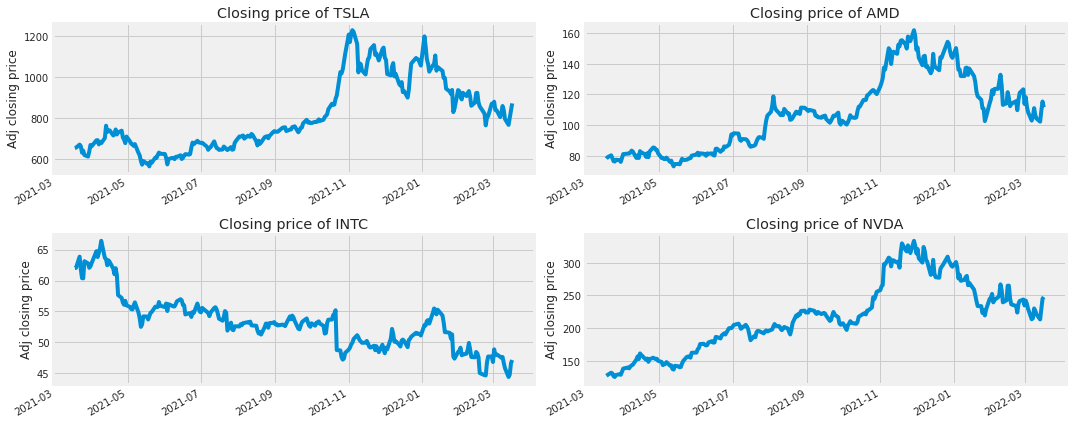

In [20]:
# Lets check closing price in a graph

plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
  plt.subplot(2, 2, i)
  company['Adj Close'].plot()
  plt.ylabel('Adj closing price')
  plt.xlabel(None)
  plt.title(f"Closing price of {tech_list[i-1]}")

plt.tight_layout()


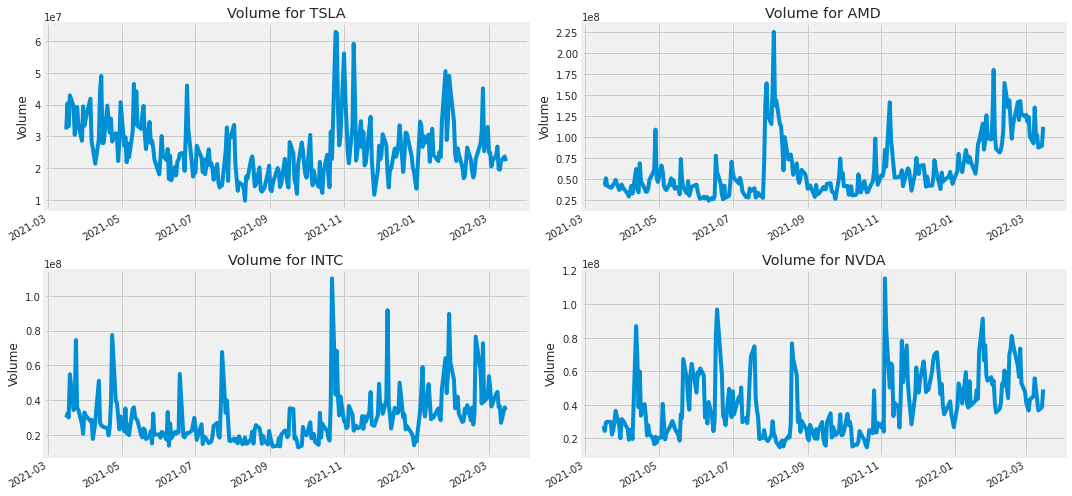

In [ ]:
# Total volume of stoc being traged each day
plt.figure(figsize =(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list,  1):
  plt.subplot(2, 2, i)
  company['Volume'].plot()
  plt.ylabel('Volume')
  plt.xlabel(None)
  plt.title(f"Volume for {tech_list[i-1]}")

plt.tight_layout()

In [24]:
# Calculate moving average of the stock

ma_day = [10 ,20, 50]

for ma in ma_day:
  for company in company_list:
    column_name = f"MA for {ma} days"
    company[column_name] = company['Adj Close'].rolling(ma).mean()

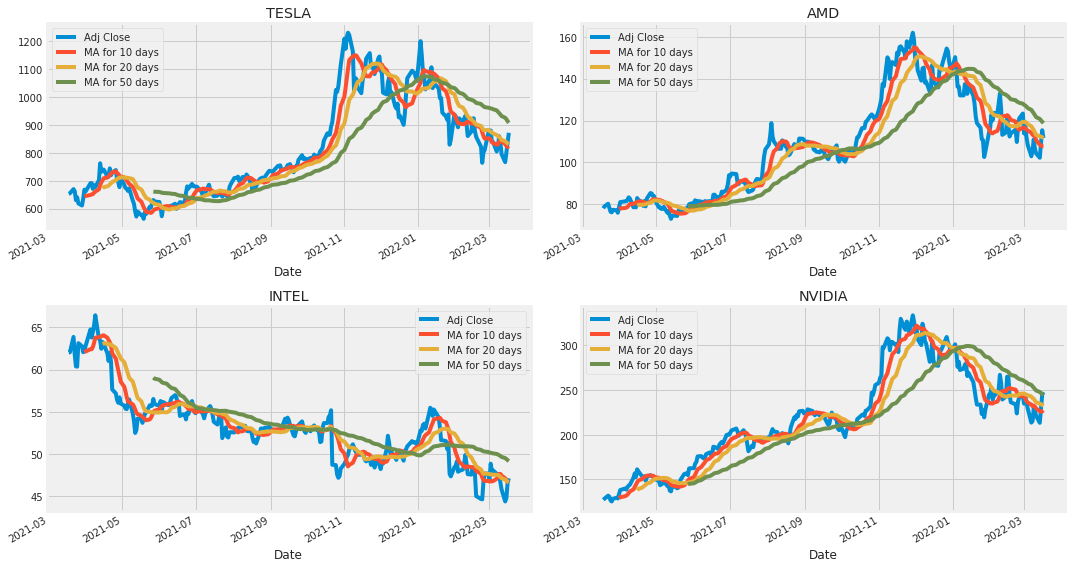

In [25]:
# plot all moving averages

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

TSLA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title("TESLA")

AMD[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title("AMD")

INTC[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title("INTEL")

NVDA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title("NVIDIA")

fig.tight_layout()

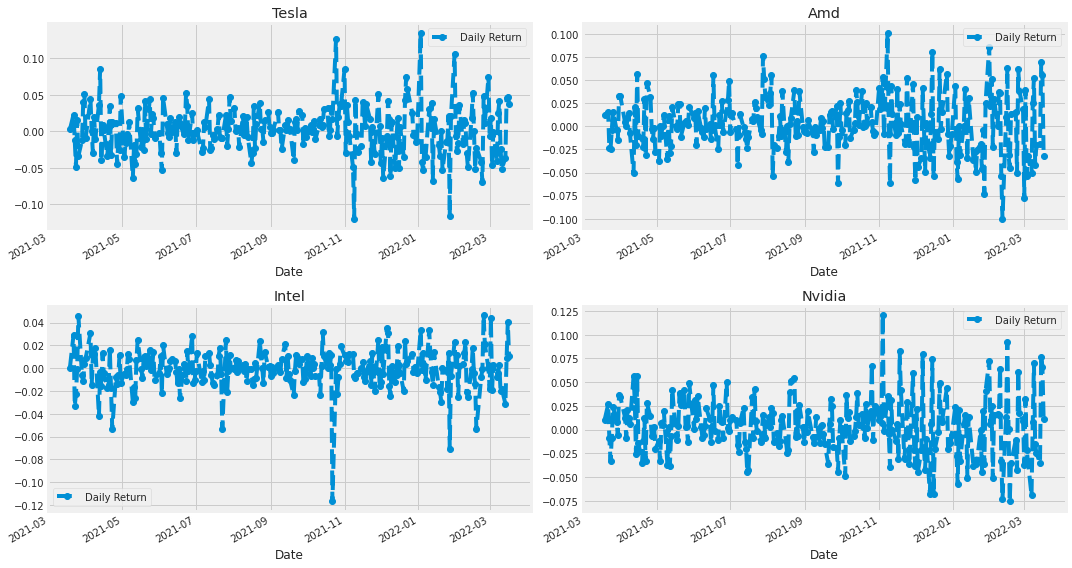

In [26]:
# Calculate daily return for each day

for company in company_list:
  company['Daily Return'] = company['Adj Close'].pct_change()

#plot daily return

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

TSLA['Daily Return'].plot(ax=axes[0,0],legend=True,linestyle='--',marker='o')
axes[0,0].set_title("Tesla")

AMD['Daily Return'].plot(ax=axes[0,1],legend=True,linestyle='--',marker='o')
axes[0,1].set_title("Amd")

INTC['Daily Return'].plot(ax=axes[1,0],legend=True,linestyle='--',marker='o')
axes[1,0].set_title("Intel")

NVDA['Daily Return'].plot(ax=axes[1,1],legend=True,linestyle='--',marker='o')
axes[1,1].set_title("Nvidia")

fig.tight_layout()





In [27]:
TSLA.describe()

,Open,High,Low,Close,Adj Close,Volume,Daily Return,MA for 10 days,MA for 20 days,MA for 50 days
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02,252.000000,244.000000,234.000000,204.000000
mean,809.731146,827.221183,790.963558,809.424425,809.424425,2.564606e+07,0.001705,812.089453,814.903114,819.208446
std,172.957405,179.034434,164.823627,172.077712,172.077712,9.272515e+06,0.033570,169.447547,167.258752,162.312560
min,552.549988,566.210022,546.979980,563.460022,563.460022,9.800600e+06,-0.119903,584.827008,596.594006,626.838202
25%,677.380005,687.510010,666.140015,671.869995,671.869995,1.892490e+07,-0.017628,669.228751,672.317617,658.870899
50%,745.890015,761.039978,739.119995,753.869995,753.869995,2.392430e+07,0.001573,748.958997,753.910750,756.861797
75%,928.179993,946.270020,903.210022,931.250000,931.250000,3.060500e+07,0.019189,963.703003,994.963871,983.624796
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,6.285210e+07,0.135317,1149.187988,1119.457501,1073.611595


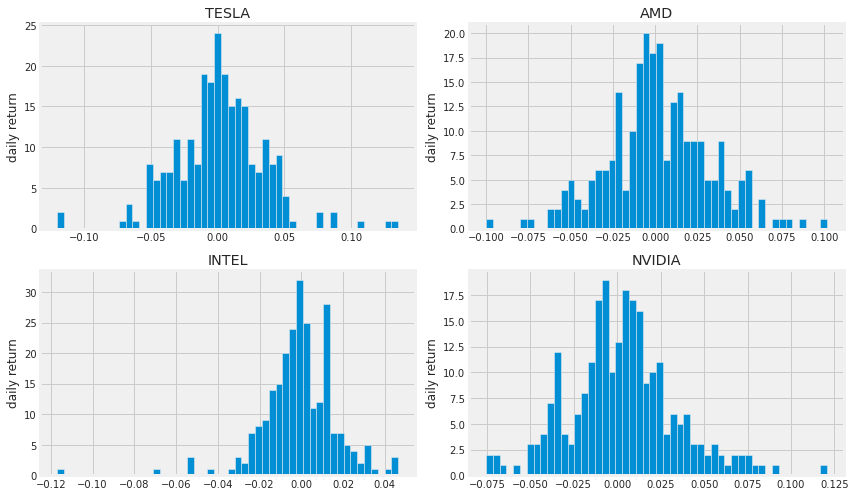

In [28]:
# Check average daily return using histogram
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
  plt.subplot(2,2, i)
  company['Daily Return'].hist(bins=50)
  plt.ylabel('daily return')
  plt.xlabel(None)
  plt.title(f'{company_name[i-1]}')

plt.tight_layout()


In [29]:
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2021-03-18 to 2022-03-17
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Open            253 non-null    float64
 1   High            253 non-null    float64
 2   Low             253 non-null    float64
 3   Close           253 non-null    float64
 4   Adj Close       253 non-null    float64
 5   Volume          253 non-null    int64  
 6   company_name    253 non-null    object 
 7   Daily Return    252 non-null    float64
 8   MA for 10 days  244 non-null    float64
 9   MA for 20 days  234 non-null    float64
 10  MA for 50 days  204 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 23.7+ KB


In [36]:
# Find correlation between different stocks
# This code doesnt work
#closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']
#closing_df.head()

In [35]:
import pandas
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']
closing_df.head()

[*********************100%***********************]  4 of 4 completed


,AMD,INTC,NVDA,TSLA
Date,,,,
2021-03-18,78.120003,62.025604,127.136185,653.159973
2021-03-19,79.059998,62.054794,128.367813,654.869995
2021-03-22,80.300003,63.874783,131.770447,670.000000
2021-03-23,78.379997,61.782284,130.616272,662.159973
2021-03-24,76.480003,60.380798,126.341751,630.270020


In [37]:
tech_rets = closing_df.pct_change()
tech_rets.head()

,AMD,INTC,NVDA,TSLA
Date,,,,
2021-03-18,NaN,NaN,NaN,NaN
2021-03-19,0.012033,0.000471,0.009687,0.002618
2021-03-22,0.015684,0.029329,0.026507,0.023104
2021-03-23,-0.023910,-0.032759,-0.008759,-0.011702
2021-03-24,-0.024241,-0.022684,-0.032726,-0.048160


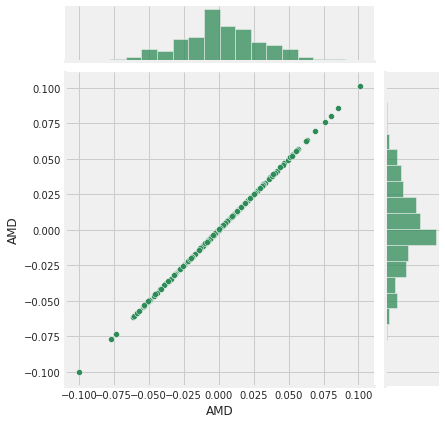

In [39]:
# Compare daily percentage return of two stocks to check how they are correlated.
#Comparing a stock with itself will show a perfectly linear relation ship.
sns.jointplot(x="AMD", y="AMD",data=tech_rets, kind='scatter', color='seagreen' )

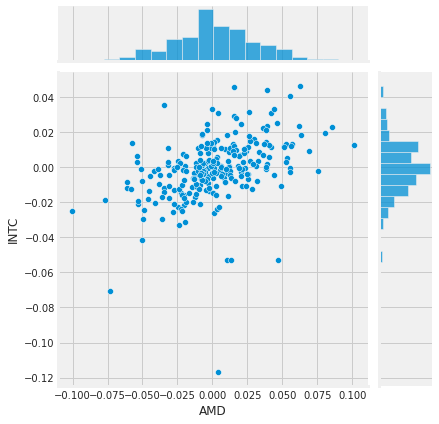

In [40]:
#Lets check relation ship between AMD and intel

sns.jointplot(x='AMD', y='INTC', data=tech_rets, kind='scatter',)

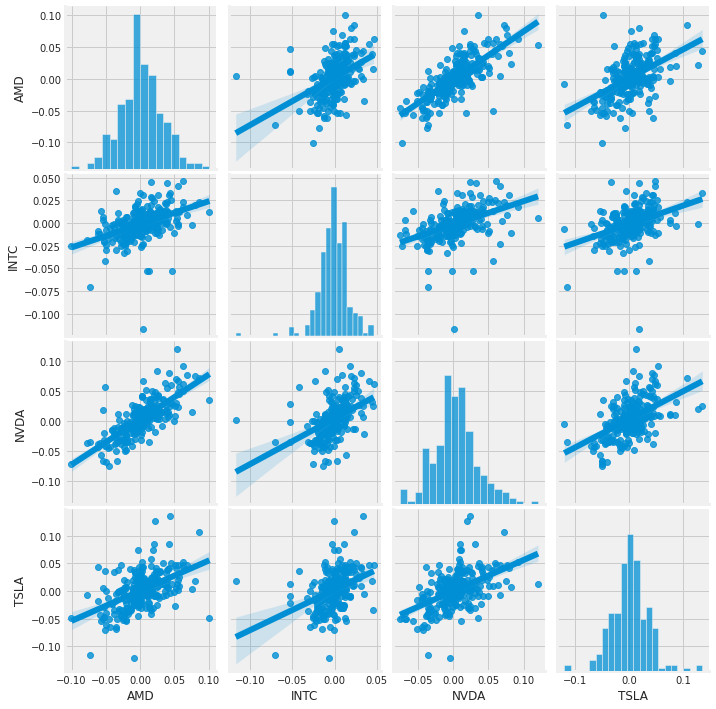

In [41]:
# We can simply call pair plot on data for an automatic visual analysis of all the comparisons

sns.pairplot(tech_rets,kind='reg')

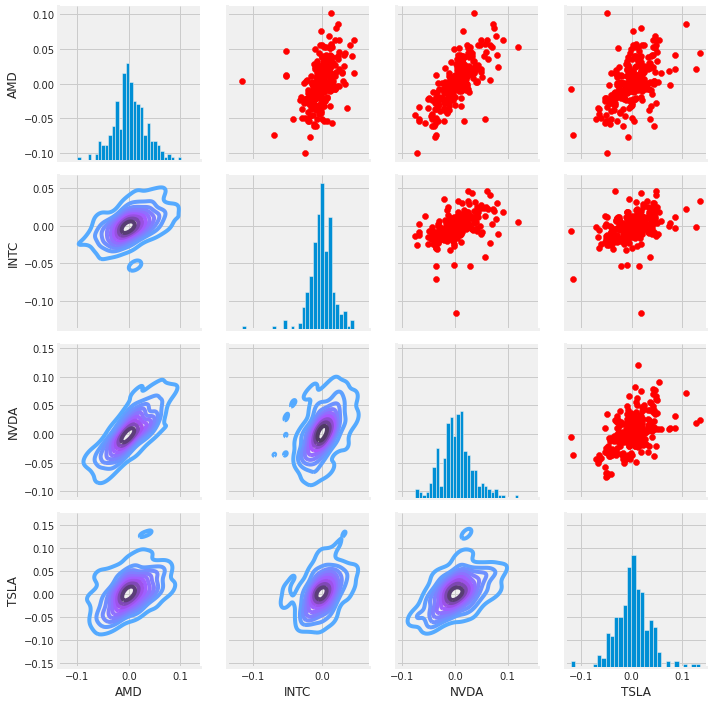

In [44]:
# lets check other options of SNS

return_fig = sns.PairGrid(tech_rets.dropna())
#specify what upper figure will look like
return_fig.map_upper(plt.scatter, color='red')

# we can also define the lower triangle in the figure including the plot type or the color
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we will define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

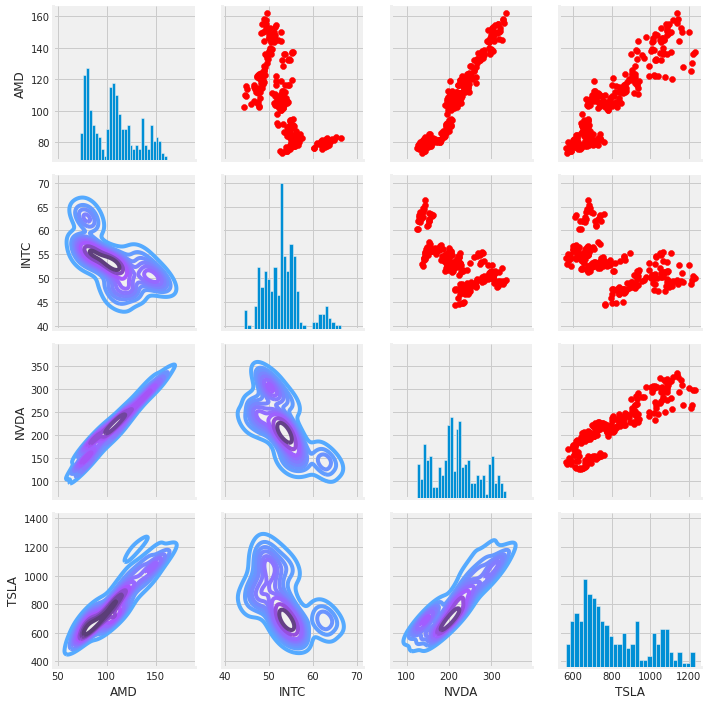

In [47]:
# Set up our figure by naming it returns_fig call PariPlot on the dataframe
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter, color='red')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

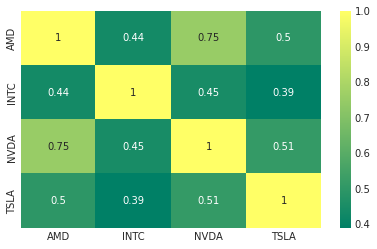

In [48]:
# Check the correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

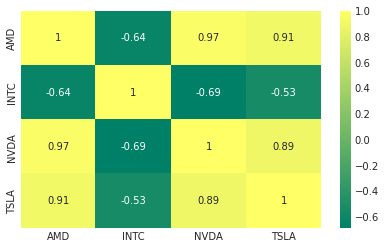

In [49]:
sns.heatmap(closing_df.corr(),annot=True, cmap='summer')

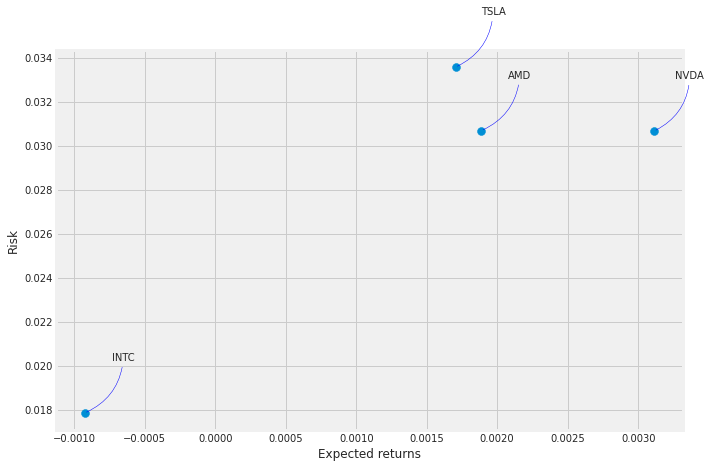

In [53]:
# finding risk of investing in perticluar stock
rets= tech_rets.dropna()
area=np.pi*20

plt.figure(figsize=(10,7))
plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
  plt.annotate(label, xy=(x,y),xytext=(50,50), textcoords='offset points', ha='right',va='bottom',
  arrowprops=dict(arrowstyle='-', color='blue',connectionstyle='arc3, rad=-0.3'))

In [56]:
#predict the price of AMD
df = pdr.get_data_yahoo('AMD',  start='2012-01-01', end=end)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,5.530000,5.590000,5.440000,5.480000,5.480000,12675100
2012-01-04,5.470000,5.490000,5.410000,5.460000,5.460000,8034900
2012-01-05,5.450000,5.570000,5.350000,5.460000,5.460000,11476900
2012-01-06,5.440000,5.520000,5.390000,5.430000,5.430000,12938600
2012-01-09,5.420000,5.600000,5.380000,5.590000,5.590000,12585400
...,...,...,...,...,...,...
2022-03-11,108.129997,108.190002,104.080002,104.290001,104.290001,87529900
2022-03-14,102.989998,105.239998,101.040001,102.250000,102.250000,89731700
2022-03-15,102.660004,109.690002,101.790001,109.330002,109.330002,112425500


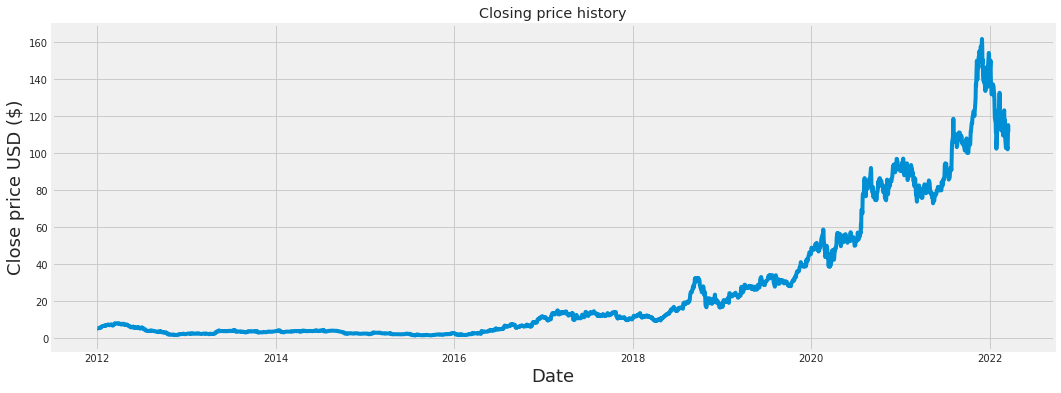

In [57]:
plt.figure(figsize=(16,6))
plt.title('Closing price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel("Close price USD ($)", fontsize=18)
plt.show()

In [58]:
#Create a new dataframe with only the close column
data=df.filter(['Close'])
# Convert the dataframe to numpy array
dataset=data.values
# Get the training data
training_data_len=int(np.ceil(len(dataset)*0.95))
training_data_len

2441

In [59]:
#Scale the data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data


array([[0.02408135],
       [0.02395658],
       [0.02395658],
       ...,
       [0.67196955],
       [0.70965126],
       [0.68669287]])

In [62]:
# Create the scaled training dataset
train_data= scaled_data[0:int(training_data_len), :]

x_train=[]
y_train=[]

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

# convert x_tra_in and y_train into numpy arrays

x_train, y_train =np.array(x_train), np.array(y_train)

# reshape the data
x_train= np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

[array([0.02408135, 0.02395658, 0.02395658, 0.02376942, 0.02476761,
       0.02551625, 0.02614012, 0.02620251, 0.02520432, 0.02564103,
       0.02713831, 0.02869798, 0.02994572, 0.03056959, 0.03063198,
       0.03187972, 0.03212926, 0.0324412 , 0.0319421 , 0.03175494,
       0.0329403 , 0.03312745, 0.03406326, 0.03306507, 0.03437519,
       0.03512384, 0.03506145, 0.0338761 , 0.03537338, 0.03556055,
       0.03543577, 0.03724499, 0.03618442, 0.035311  , 0.03443758,
       0.03537338, 0.03643396, 0.03649635, 0.03680828, 0.03574771,
       0.0367459 , 0.03643396, 0.03400087, 0.0329403 , 0.03462474,
       0.03649635, 0.03718261, 0.03668351, 0.03830557, 0.03830557,
       0.04136253, 0.04105059, 0.04092582, 0.04017718, 0.0400524 ,
       0.03999002, 0.04036434, 0.04130014, 0.04098821, 0.04030195])]
[0.040551498736540334]

[array([0.02408135, 0.02395658, 0.02395658, 0.02376942, 0.02476761,
       0.02551625, 0.02614012, 0.02620251, 0.02520432, 0.02564103,
       0.02713831, 0.02869798, 0.0

In [65]:
from keras.backend import batch_dot
# Create model

from keras.models import Sequential
from keras.layers import Dense, LSTM

# build the model

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape =(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model

model.fit(x_train, y_train, batch_size=1 , epochs=1)

2381/2381 [==============================] - 82s 33ms/step - loss: 8.2260e-04


In [67]:
# Create the testing dataset
test_data = scaled_data[training_data_len-60:,:]

# Create the dataset x_test and y_teset
x_test=[]
y_test= dataset[training_data_len:,:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

#convert the data into numpy array
x_test= np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

# Get the model prediction values
predictions=model.predict(x_test)
precidtions=scaler.inverse_transform(predictions)

# Get the root mean square error

rmse =  np.sqrt(np.mean(((predictions-y_test)**2)))
rmse

126.09665532137919

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


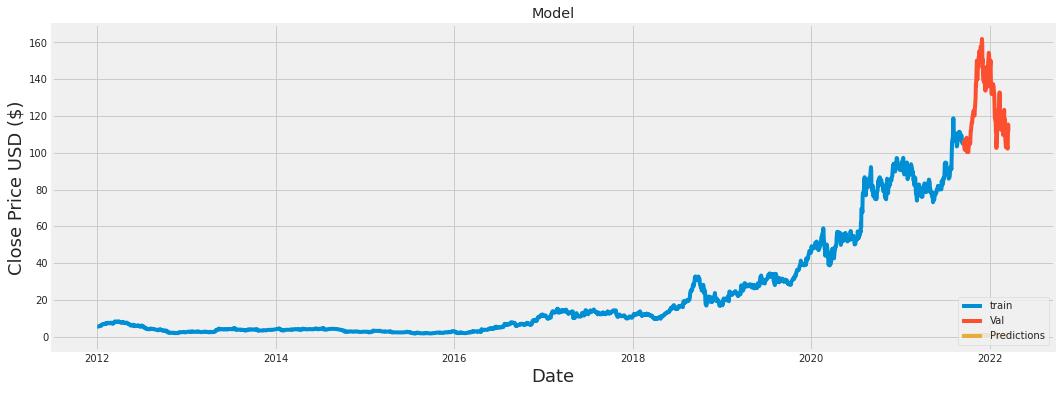

In [68]:
#Plot the data

train =data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

# visulize the data

plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [69]:
# show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-09-15,105.599998,0.625713
2021-09-16,106.220001,0.624762
2021-09-17,103.879997,0.625220
2021-09-20,101.550003,0.623220
2021-09-21,102.820000,0.617893
...,...,...
2022-03-11,104.290001,0.638373
2022-03-14,102.250000,0.633330
2022-03-15,109.330002,0.625982
